In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import random
import pathlib
import os

In [2]:
PATH = pathlib.Path(os.path.abspath('')).absolute()
PATH

WindowsPath('C:/Users/mathi/Desktop/cub-dataset')

In [3]:
DATASET_PATH = PATH / "CUB_200_2011"
IMAGES_PATH = DATASET_PATH / "images"
ATTRIBUTES_PATH = DATASET_PATH / "attributes"
PARTS_PATH = DATASET_PATH / "parts"

In [4]:
#import tensorflow as tf

In [5]:
import sys
sys.version

'3.11.10 | packaged by Anaconda, Inc. | (main, Oct  3 2024, 07:22:26) [MSC v.1929 64 bit (AMD64)]'

In [6]:
#print(tf.__version__)

In [7]:
!pip install opencv-python

In [8]:
import cv2

In [9]:
def load_img(img):
    img = cv2.imread(IMAGES_PATH / img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img    

In [10]:
img = load_img("008.Rhinoceros_Auklet/Rhinoceros_Auklet_0050_797534.jpg")
img.shape

(500, 500, 3)

In [181]:
def load_process(filename, process):
    res = dict()
    with open(filename, 'r') as file:
        content = file.read()
    lines = content.split('\n')
    for line in lines:
        line = line.strip()
        if not line: continue
        parts = line.split(' ', 1)
        img_id = int(parts[0])
        res[img_id] = process(parts[1])
    return res

In [279]:
def load_process_multiple(filename, process):
    res = dict()
    with open(filename, 'r') as file:
        content = file.read()
    lines = content.split('\n')
    for line in lines:
        line = line.strip()
        if not line: continue
        parts = line.split(' ', 1)
        img_id = int(parts[0])
        if img_id not in res:
            res[img_id] = []
        res[img_id].append(process(parts[1]))
    return res

In [235]:
id_images_path = load_process(DATASET_PATH / "images.txt", lambda x: x)
path_id = {path: id for id, path in id_images_path.items()}

In [238]:
list(path_id.items())[:5]

[('001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg', 1),
 ('001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg', 2),
 ('001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg', 3),
 ('001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg', 4),
 ('001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg', 5)]

In [246]:
def name_from_path(path):
    name = path.split('/')[1]
    parts=name.split('_')
    prefix = []
    for part in parts:
        if not part.isdigit():
            prefix.append(part)
        else:
            break
    return ' '.join(prefix)

In [247]:
id_name = {id: name_from_path(path) for id, path in id_images_path.items()}
list(id_name.items())[:5]

[(1, 'Black Footed Albatross'),
 (2, 'Black Footed Albatross'),
 (3, 'Black Footed Albatross'),
 (4, 'Black Footed Albatross'),
 (5, 'Black Footed Albatross')]

In [226]:
bboxes = load_process(DATASET_PATH / "bounding_boxes.txt", lambda x: tuple(map(lambda x: int(float(x)), x.split(' '))))

In [227]:
list(bboxes.values())[:5]

[(60, 27, 325, 304),
 (139, 30, 153, 264),
 (14, 112, 388, 186),
 (112, 90, 255, 242),
 (70, 50, 134, 303)]

In [248]:
def plot_bbox(image_path):
    image = load_img(image_path)
    image_id = path_id[image_path]
    bbox = bboxes[image_id]
    label = id_name[image_id]
    print(label)
    
    
    fig = plt.figure()
    pad=5
    color = (0, 255, 0)
    cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)

    (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.8, 2)
    cv2.rectangle(image, (bbox[0], bbox[1] - h - pad), (bbox[0] + w, bbox[1]), color, -1)
    
    cv2.putText(image, label, (bbox[0], bbox[1] - pad), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
    plt.imshow(image, interpolation='bilinear')
    plt.show()

Rhinoceros Auklet


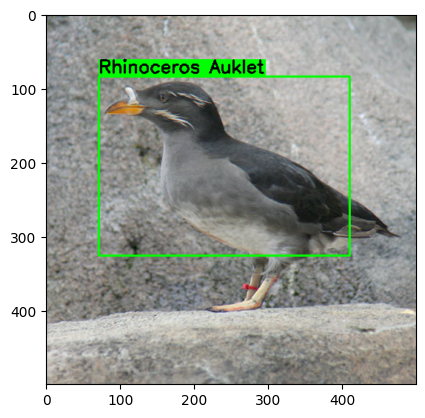

In [249]:
plot_bbox("008.Rhinoceros_Auklet/Rhinoceros_Auklet_0050_797534.jpg")

In [191]:
part_labels = load_process(PARTS_PATH / "parts.txt", lambda x: x)
list(part_labels.items())[:5]

[(1, 'back'), (2, 'beak'), (3, 'belly'), (4, 'breast'), (5, 'crown')]

In [192]:
img_parts = load_process_multiple(PARTS_PATH / "part_locs.txt", lambda x: tuple(map(lambda x: int(float(x)), x.split(' '))))

In [193]:
list(img_parts.items())[:2]

[(1,
  [(1, 0, 0, 0),
   (2, 312, 182, 1),
   (3, 0, 0, 0),
   (4, 0, 0, 0),
   (5, 186, 45, 1),
   (6, 247, 79, 1),
   (7, 0, 0, 0),
   (8, 0, 0, 0),
   (9, 0, 0, 0),
   (10, 100, 221, 1),
   (11, 183, 101, 1),
   (12, 0, 0, 0),
   (13, 0, 0, 0),
   (14, 0, 0, 0),
   (15, 215, 194, 1)]),
 (2,
  [(1, 228, 138, 1),
   (2, 282, 154, 1),
   (3, 0, 0, 0),
   (4, 248, 158, 1),
   (5, 266, 141, 1),
   (6, 272, 144, 1),
   (7, 0, 0, 0),
   (8, 0, 0, 0),
   (9, 208, 102, 1),
   (10, 256, 141, 1),
   (11, 270, 146, 1),
   (12, 0, 0, 0),
   (13, 234, 193, 1),
   (14, 163, 155, 1),
   (15, 260, 155, 1)])]

In [252]:
def plot_parts(image_path):
    image=load_img(image_path)
    image_id = path_id[image_path]
    
    fig, ax = plt.subplots(1, 1)
    pad=5
    color = (0, 255, 0)
    parts = img_parts[image_id]
    non_visible = "Not visible:\n- " + '\n- '.join(part_labels[part_id] for part_id, _, _, visible in parts if not visible)
    
    for part_id, x, y, visible in parts:
        if not visible: continue
        
        cv2.circle(image, (x, y), 5, (255,0,0), -1)

        label = part_labels[part_id]
        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.8, 2)
        cv2.rectangle(image, (x, y - h - pad), (x + w, y), (255,255,255), -1)
        
        cv2.putText(image, label, (x,y - pad), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)

    props = dict(boxstyle='round', facecolor='white', alpha=0)
    ax.text(1.03, 0.98, non_visible, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
    plt.imshow(image, interpolation='bilinear')
    plt.show()

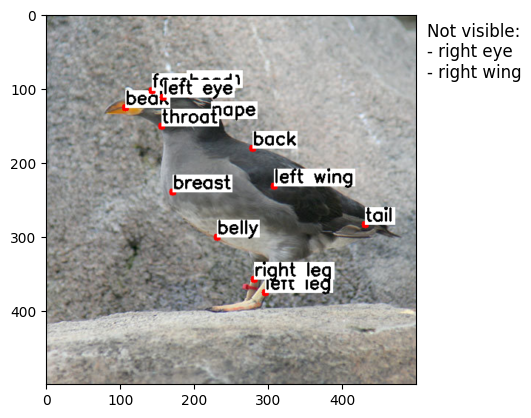

In [253]:
plot_parts(example)

In [ ]:
lambda x: tuple(map(lambda x: int(float(x)), x.split(' '))))

In [263]:
attribute_id_name = load_process("attributes.txt", lambda x: x)
list(attribute_id_name.items())[20:22]

[(21, 'has_wing_color::black'), (22, 'has_wing_color::white')]

In [278]:
img_id_attrs = load_process_multiple(ATTRIBUTES_PATH / "image_attribute_labels.txt", lambda x: tuple(map(lambda x: int(float(x)), (s for s in x.split(' ') if s))))

In [281]:
list(img_id_attrs.items())[:1]

[(1,
  [(1, 0, 3, 27),
   (2, 0, 3, 27),
   (3, 0, 3, 27),
   (4, 0, 3, 27),
   (5, 1, 3, 27),
   (6, 0, 3, 27),
   (7, 0, 3, 27),
   (8, 0, 3, 27),
   (9, 0, 3, 27),
   (10, 0, 1, 1),
   (11, 0, 1, 1),
   (12, 0, 1, 1),
   (13, 0, 1, 1),
   (14, 0, 1, 1),
   (15, 0, 1, 1),
   (16, 0, 1, 1),
   (17, 0, 1, 1),
   (18, 0, 1, 1),
   (19, 0, 1, 1),
   (20, 0, 1, 1),
   (21, 0, 1, 1),
   (22, 0, 1, 1),
   (23, 0, 1, 1),
   (24, 0, 1, 1),
   (25, 0, 1, 1),
   (26, 0, 1, 1),
   (27, 0, 1, 1),
   (28, 0, 1, 1),
   (29, 0, 1, 1),
   (30, 0, 1, 1),
   (31, 0, 1, 1),
   (32, 0, 1, 1),
   (33, 0, 1, 1),
   (34, 0, 1, 1),
   (35, 0, 1, 1),
   (36, 0, 1, 1),
   (37, 0, 1, 1),
   (38, 0, 1, 1),
   (39, 0, 1, 1),
   (40, 0, 1, 4),
   (41, 0, 1, 4),
   (42, 0, 1, 4),
   (43, 0, 1, 4),
   (44, 0, 1, 4),
   (45, 0, 1, 4),
   (46, 0, 1, 4),
   (47, 0, 1, 4),
   (48, 0, 1, 4),
   (49, 0, 1, 4),
   (50, 0, 1, 4),
   (51, 0, 1, 4),
   (52, 0, 1, 4),
   (53, 0, 1, 4),
   (54, 0, 1, 4),
   (55, 0, 1, 1),
   (5

In [297]:
def plot_attr(image_path):
    image=load_img(image_path)
    image_id = path_id[image_path]
    
    fig, ax = plt.subplots(1, 1)
    pad=5
    color = (0, 255, 0)
    attrs = img_id_attrs[image_id]
    non_visible = "Attributes:\n- " + '\n- '.join(attribute_id_name[attr_id] for attr_id, present, _, _ in attrs if present)

    props = dict(boxstyle='round', facecolor='white', alpha=0)
    ax.text(1.03, 0.98, non_visible, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
    plt.imshow(image, interpolation='bilinear')
    plt.show()

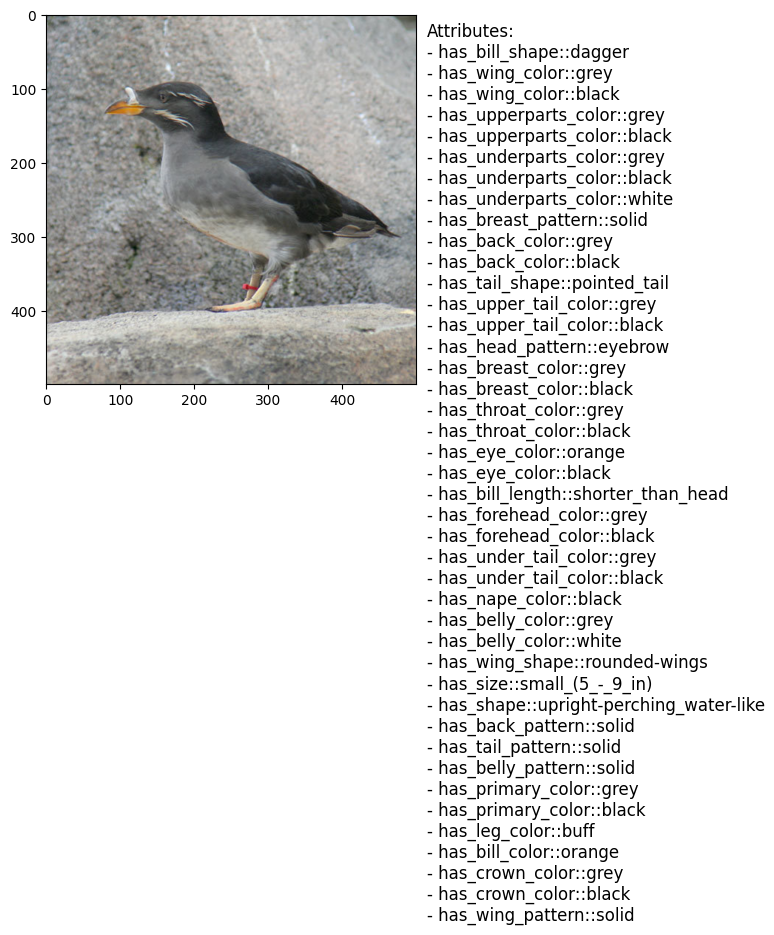

In [298]:
plot_attr("008.Rhinoceros_Auklet/Rhinoceros_Auklet_0050_797534.jpg")